In [68]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from utils import AssignProbSent, plot_minimal_pair, show_unigram_prob, compare_sets
from utils import log_uni_unk_prob, sentences_unigram_probability, calculating_perplexity
import utils
from sentence_manipulation import find_sentence_that_have, comparative_sent_printing, x2y
count_sign = '__COUNT__'

# **Load the Model and test set sentences**

In [69]:
modelname = 'TrieRoot'
# Trained on Harry Potter 1-7
infile = open(modelname, 'rb')
root = pickle.load(infile)
infile.close()

filename = 'eval_dataset'
infile = open(filename, 'rb')
eval_set = pickle.load(infile)
infile.close()

In [70]:
print(f'There are {root[count_sign]} tokens in the training corpus')
print(f'And {len(eval_set)} sentences in the evaluation set.')

There are 1539227 tokens in the training corpus
And 4355 sentences in the evaluation set.


In [71]:
calculating_perplexity(eval_set, root, AssignProbSent)

The mean perplexity of these 4355 sentences are 29.5


29.5

# Find numbers of bigram

In [72]:
for each in ['task','tasks','cat','that','to']:
    print(f'the word is {each}')
    print(len(root[each]))
    print(root[each][count_sign])
    print('done\n')

the word is task
37
106
done

the word is tasks
14
18
done

the word is cat
59
134
done

the word is that
1457
11200
done

the word is to
2415
28114
done



In [73]:
root['that'][count_sign]

11200

In [74]:
len(root['hermione'])

705

In [75]:
root['hermione'][count_sign]

5238

In [76]:
def fin_uni_bi_tri_of(root, count_sign ='__COUNT__'):
    vocab = len(root)-1
    nu = len(root)-1
    nb = 0
    nt = 0
    for key0 in root.keys():
        if key0 == count_sign:
            continue
        else:
            nb += len(root[key0].keys())-1
        for key1 in root[key0].keys():
            if key1 == count_sign:
                continue
            else:
                nt += len(root[key0][key1].keys())-1
    print(nu)
    print(nb)
    print(nt)

In [77]:
fin_uni_bi_tri_of(root)

25997
292602
738312


In [78]:
len(root)

25998

# Get the target sentences

In [79]:
# a=[0,0]
# for i, key in enumerate(['be', 'were']):
#     a[i]=find_sentence_that_have(key,eval_set)
# # for i, x in enumerate(a[1]):
# #     print(i,'____:',x)
# print(len(a[0]),len(a[1]))

# Counting Frenquencies of  tokens

In [48]:
# for x in ['is','harry','all','the','rarely','okay','back','having','as','going']:
#     print(x,'\t',root[x][count_sign])

# **⬇️Dump various files onto the disk⬇️**

In [49]:
# filename='be_sentences'
# outfile = open(filename,'wb')
# pickle.dump(a[0],outfile)
# outfile.close()

# Experiments on **is sentences**

In [50]:
# unigram_prob_dictionary = {}
# for i,w in enumerate(root.keys()):
#     if w!=count_sign:
#         unigram_prob_dictionary[w] = show_unigram_prob(root,w)
#     if i%1000 == 0:
#         print(f'{i}iterations finished')
# print(len(unigram_prob_dictionary))

In [51]:
# unigram_file='unigram_log_probability'
# outfile = open(unigram_file, 'wb')
# pickle.dump(unigram_prob_dictionary,outfile)
# outfile.close()

In [52]:
filename='unigram_log_probability'
infile = open(filename,'rb')
unigram_prob_dictionary=pickle.load(infile)
infile.close()
# print(len(is_sentences))

In [53]:
# unk probability
x = -15.23 


In [54]:
# e =999
# word = ''
# for key in unigram_prob_dictionary.keys():
#     cur_error = np.abs(unigram_prob_dictionary[key]-x)
#     if cur_error<e:
#         e = cur_error
#         word = key
        

In [55]:
# print(word, unigram_prob_dictionary[word])

In [56]:
target_list = []
l4 = ['is','are','was','were','be']
for w in l4:
    error = 999
    print(w)
    print(unigram_prob_dictionary[w])
    for key in unigram_prob_dictionary.keys():
        if key not in l4 and key!='got':
            cur_error = np.abs(unigram_prob_dictionary[key] - unigram_prob_dictionary[w])
            if cur_error < error:
                target = key  
                error = cur_error
    target_list.append((w,target,unigram_prob_dictionary[target]))

is
-6.2102
are
-6.5905
was
-4.5664
were
-5.8797
be
-5.8301


In [57]:
print(target_list)

[('is', 'who', -6.2341), ('are', 'my', -6.6062), ('was', 'his', -4.5987), ('were', 'from', -5.8858), ('be', 'out', -5.8327)]


In [58]:
for w in ['had','was','were','be','is','out']:
    print(w, unigram_prob_dictionary[w])

had -5.0215
was -4.5664
were -5.8797
be -5.8301
is -6.2102
out -5.8327


In [59]:
filename='is_sentences'
infile = open(filename,'rb')
is_sentences=pickle.load(infile)
infile.close()
print(len(is_sentences))

214


In [89]:
print(is_sentences[6])
un_sen = ['sdfdf','want','to']

['“', 'yeah', ',', 'it', 'is', ',', '”', 'said', 'ron', ',', 'climbing', 'the', 'ladder', '.']


In [90]:
print(AssignProbSent(un_sen,root))

[-11.998317889479228, -23.996635778958456, -25.483925742651472]


In [61]:
bad_is_sentences = x2y(is_sentences, 'is','are')
unk_is_sentences = x2y(is_sentences, 'is','who')

In [65]:
a = is_sentences[6][1:8]
b = bad_is_sentences[6][1:8]

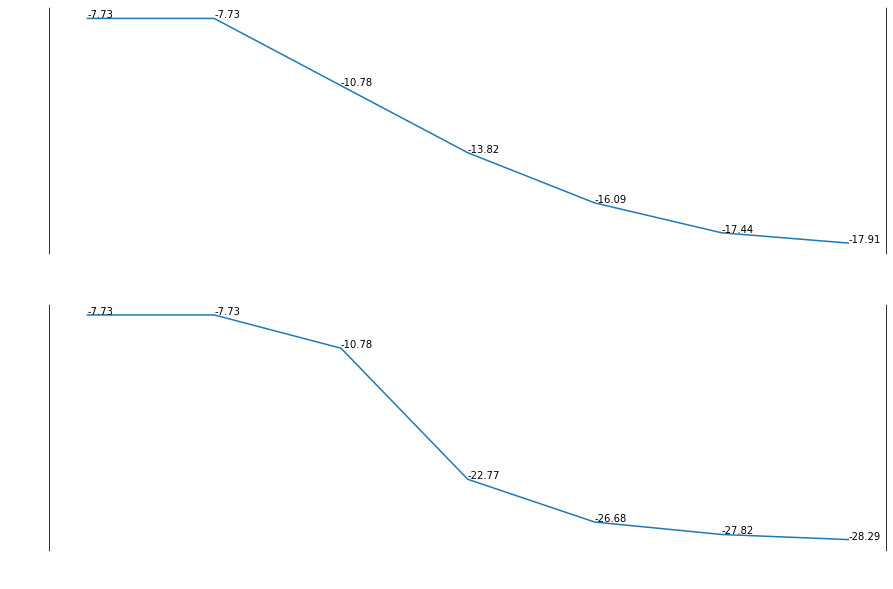

================	===============	===============	===============	===============	

This is a plot illustrating how the probability of the test sentence: 

 ['yeah', ',', 'it', 'is', ',', '”', 'said']

and its miminal pair: 

['yeah', ',', 'it', 'are', ',', '”', 'said'] 

declines as the the algorithm process each word


<Figure size 432x288 with 0 Axes>

In [66]:
plot_minimal_pair(a, b, root, AssignProbSent, __plt__=plt)

In [29]:
for each in ['was','are','were','be','who']:
    bad_is_sentences = x2y(is_sentences, 'is', each)
    compare_sets(is_sentences,bad_is_sentences,root)
    


-----------------PERPLEXITY-------------------

good Perplexity is : 15.76
bad Perplexity is : 25.59
201 out of 214 are correct predictions

-----------------PERPLEXITY-------------------

good Perplexity is : 15.76
bad Perplexity is : 59.32
211 out of 214 are correct predictions

-----------------PERPLEXITY-------------------

good Perplexity is : 15.76
bad Perplexity is : 58.2
209 out of 214 are correct predictions

-----------------PERPLEXITY-------------------

good Perplexity is : 15.76
bad Perplexity is : 51.34
211 out of 214 are correct predictions

-----------------PERPLEXITY-------------------

good Perplexity is : 15.76
bad Perplexity is : 61.63
213 out of 214 are correct predictions


#### Select non-local sentences

In [30]:
non_local_dependency_sentence_index = [2,9,14,18,36,43,45,46,60,78,83,84,95,99,116,119,120,122,126,133,137,144,155,158,182,185,199,206,207,210]
lis = []
for i in non_local_dependency_sentence_index:
#     print(is_sentences[i])
    lis.append(is_sentences[i])

print(len(lis))

30


In [31]:
for each in ['was','are','were','be','who']:
    bad_lis = x2y(lis, 'is', each)
    compare_sets(lis,bad_lis,root)
    


-----------------PERPLEXITY-------------------

good Perplexity is : 13.32
bad Perplexity is : 21.05
30 out of 30 are correct predictions

-----------------PERPLEXITY-------------------

good Perplexity is : 13.32
bad Perplexity is : 25.35
28 out of 30 are correct predictions

-----------------PERPLEXITY-------------------

good Perplexity is : 13.32
bad Perplexity is : 22.33
28 out of 30 are correct predictions

-----------------PERPLEXITY-------------------

good Perplexity is : 13.32
bad Perplexity is : 26.15
29 out of 30 are correct predictions

-----------------PERPLEXITY-------------------

good Perplexity is : 13.32
bad Perplexity is : 26.17
30 out of 30 are correct predictions


# Experiments on **are sentences**

In [32]:
filename='are_sentences'
infile = open(filename,'rb')
are_sentences=pickle.load(infile)
infile.close()
print(len(are_sentences))

154


In [33]:
for each in ['was','is','were','be','my']:
    bad_are_sentences = x2y(are_sentences, 'are', each)
    compare_sets(are_sentences,bad_are_sentences,root)


-----------------PERPLEXITY-------------------

good Perplexity is : 16.17
bad Perplexity is : 26.83
153 out of 154 are correct predictions

-----------------PERPLEXITY-------------------

good Perplexity is : 16.17
bad Perplexity is : 28.53
153 out of 154 are correct predictions

-----------------PERPLEXITY-------------------

good Perplexity is : 16.17
bad Perplexity is : 20.91
148 out of 154 are correct predictions

-----------------PERPLEXITY-------------------

good Perplexity is : 16.17
bad Perplexity is : 34.27
153 out of 154 are correct predictions

-----------------PERPLEXITY-------------------

good Perplexity is : 16.17
bad Perplexity is : 45.72
154 out of 154 are correct predictions


## Long distance dependency are sentences

In [46]:
non_local_dependency_are_sentence_index =  [6, 17,22,34,48,53,58,83,90,93,94,129,132,134]
lare = []
for i in non_local_dependency_are_sentence_index:
#     print(is_sentences[i])
    lare.append(are_sentences[i])
print(len(lare))

14


In [47]:
for each in ['was','is','were','be','my']:
    bad_lare = x2y(lare, 'are', each)
    compare_sets(lare,bad_lare,root)

Good avg log_prob is : -80.76
Bad avg log_prob is : -93.45

-----------------PERPLEXITY-------------------

good Perplexity is : 17.83
bad Perplexity is : 24.94
14 out of 14 are correct predictions
Good avg log_prob is : -80.76
Bad avg log_prob is : -96.03

-----------------PERPLEXITY-------------------

good Perplexity is : 17.83
bad Perplexity is : 35.17
14 out of 14 are correct predictions
Good avg log_prob is : -80.76
Bad avg log_prob is : -95.95

-----------------PERPLEXITY-------------------

good Perplexity is : 17.83
bad Perplexity is : 34.49
13 out of 14 are correct predictions
Good avg log_prob is : -80.76
Bad avg log_prob is : -97.51

-----------------PERPLEXITY-------------------

good Perplexity is : 17.83
bad Perplexity is : 27.91
14 out of 14 are correct predictions
Good avg log_prob is : -80.76
Bad avg log_prob is : -101.57

-----------------PERPLEXITY-------------------

good Perplexity is : 17.83
bad Perplexity is : 36.66
14 out of 14 are correct predictions


# Experiment on **was sentences**

In [34]:
filename='was_sentences'
infile = open(filename,'rb')
was_sentences=pickle.load(infile)
infile.close()
print(len(was_sentences))

872


In [35]:
for each in ['is','are','were','be','his']:
    bad_was_sentences = x2y(was_sentences, 'was', each)
    compare_sets(was_sentences,bad_was_sentences,root)

Good avg log_prob is : -72.87
Bad avg log_prob is : -85.69

-----------------PERPLEXITY-------------------

good Perplexity is : 26.37
bad Perplexity is : 54.4
855 out of 872 are correct predictions
Good avg log_prob is : -72.87
Bad avg log_prob is : -90.61

-----------------PERPLEXITY-------------------

good Perplexity is : 26.37
bad Perplexity is : 85.1
872 out of 872 are correct predictions
Good avg log_prob is : -72.87
Bad avg log_prob is : -85.67

-----------------PERPLEXITY-------------------

good Perplexity is : 26.37
bad Perplexity is : 59.71
869 out of 872 are correct predictions
Good avg log_prob is : -72.87
Bad avg log_prob is : -89.62

-----------------PERPLEXITY-------------------

good Perplexity is : 26.37
bad Perplexity is : 69.84
871 out of 872 are correct predictions
Good avg log_prob is : -72.87
Bad avg log_prob is : -94.96

-----------------PERPLEXITY-------------------

good Perplexity is : 26.37
bad Perplexity is : 116.95
872 out of 872 are correct predictions


In [51]:
non_local_dependency_was_sentence_index =  [
    21,28,30,32,33,59,69,77,85,93,97,107,109,123,138,144,145,148,
    150,153,166,167,170,172,184,192,193,196,197,230,231,233,243,
    250,258,263,266,273,282,295,301,303,321,343,350,352,370,371,377,
    387,392,400,414,419,422,428,431,432,448,449,454,457,458,460,464,
    477,498,501,505,508,517,533,543,547,552,556,557,576,593,594,595,
    597,603,617,627,639,645,649,657,663,667,674,678,697,709,713,721,
    746,752,760,770,772,783,788,796,797,799,803,818,829,830,837,840,
    844,857,858,860,870
]
lwas = []
for i in non_local_dependency_was_sentence_index:
#     print(is_sentences[i])
    lwas.append(was_sentences[i])
    

In [52]:
for each in ['is','are','were','be','his']:
    bad_lwas = x2y(lwas, 'was', each)
    compare_sets(lwas,bad_lwas,root)

Good avg log_prob is : -79.43
Bad avg log_prob is : -93.19

-----------------PERPLEXITY-------------------

good Perplexity is : 32.46
bad Perplexity is : 48.89
117 out of 118 are correct predictions
Good avg log_prob is : -79.43
Bad avg log_prob is : -94.86

-----------------PERPLEXITY-------------------

good Perplexity is : 32.46
bad Perplexity is : 51.61
118 out of 118 are correct predictions
Good avg log_prob is : -79.43
Bad avg log_prob is : -90.86

-----------------PERPLEXITY-------------------

good Perplexity is : 32.46
bad Perplexity is : 44.02
117 out of 118 are correct predictions
Good avg log_prob is : -79.43
Bad avg log_prob is : -96.34

-----------------PERPLEXITY-------------------

good Perplexity is : 32.46
bad Perplexity is : 51.35
118 out of 118 are correct predictions
Good avg log_prob is : -79.43
Bad avg log_prob is : -96.9

-----------------PERPLEXITY-------------------

good Perplexity is : 32.46
bad Perplexity is : 54.41
118 out of 118 are correct predictions


# Experiment on **were sentences**

In [53]:
filename='were_sentences'
infile = open(filename,'rb')
were_sentences=pickle.load(infile)
infile.close()
print(len(were_sentences))

sent2write = []
for s in were_sentences:
    were_id = s.index('were')
    if (s[were_id+1]=='you' or 
        s[were_id+1]=='we' or 
        s[were_id+1]=='they' or
        s[were_id-1]=='you' or 
        s[were_id-1]=='we'or
        s[were_id-1]=='they'):
        continue
    else:
            sent2write.append(s)
print(len(sent2write))

243
171


In [54]:
subjunctive_were_index = [
    19,35,46,64,91,98,99,132,
]
subjunctive_list = []
for i in subjunctive_were_index:
    subjunctive_list.append(sent2write[i])

In [55]:
for s in were_sentences:
    if s in subjunctive_list:
        were_sentences.remove(s)

In [56]:
print(len(were_sentences))

235


In [57]:
for each in ['was','are','is','be','from']:
    bad_were_sentences = x2y(were_sentences, 'were', each)
    compare_sets(were_sentences,bad_were_sentences,root)

Good avg log_prob is : -77.61
Bad avg log_prob is : -89.02

-----------------PERPLEXITY-------------------

good Perplexity is : 44.41
bad Perplexity is : 133.13
223 out of 235 are correct predictions
Good avg log_prob is : -77.61
Bad avg log_prob is : -90.68

-----------------PERPLEXITY-------------------

good Perplexity is : 44.41
bad Perplexity is : 137.38
229 out of 235 are correct predictions
Good avg log_prob is : -77.61
Bad avg log_prob is : -93.42

-----------------PERPLEXITY-------------------

good Perplexity is : 44.41
bad Perplexity is : 149.27
230 out of 235 are correct predictions
Good avg log_prob is : -77.61
Bad avg log_prob is : -94.47

-----------------PERPLEXITY-------------------

good Perplexity is : 44.41
bad Perplexity is : 170.42
233 out of 235 are correct predictions
Good avg log_prob is : -77.61
Bad avg log_prob is : -95.64

-----------------PERPLEXITY-------------------

good Perplexity is : 44.41
bad Perplexity is : 203.38
235 out of 235 are correct predict

In [58]:
non_local_dependency_were_sentence_index =  [
    0,3,4,5,7,10,11,12,13,14,15,16,17,22,23,24,25,26,27,28,29,30,32,33,36,38,40,41,42,
    43,48,49,50,51,53,54,55,58,59,60,62,66,67,69,70,71,73,74,77,78,79,81,84,85,86,89,90,
    93,94,97,100,103,105,106,107,109,110,111,113,115,116,117,119,121,123,124,125,128,
    130,131,133,136,141,143,144,145,146,149,150,152,156,157,159,162,164,165,166,167,168,169,
]
lwere = []
for i in non_local_dependency_were_sentence_index:
#     print(is_sentences[i])
    lwere.append(sent2write[i])

In [59]:
print(len(lwere))


100


In [60]:
for each in ['was','are','is','be','from']:
    bad_lwere = x2y(lwere, 'were', each)
    compare_sets(lwere,bad_lwere,root)

Good avg log_prob is : -76.64
Bad avg log_prob is : -86.99

-----------------PERPLEXITY-------------------

good Perplexity is : 29.63
bad Perplexity is : 35.46
91 out of 100 are correct predictions
Good avg log_prob is : -76.64
Bad avg log_prob is : -92.08

-----------------PERPLEXITY-------------------

good Perplexity is : 29.63
bad Perplexity is : 46.37
98 out of 100 are correct predictions
Good avg log_prob is : -76.64
Bad avg log_prob is : -92.71

-----------------PERPLEXITY-------------------

good Perplexity is : 29.63
bad Perplexity is : 47.7
99 out of 100 are correct predictions
Good avg log_prob is : -76.64
Bad avg log_prob is : -94.89

-----------------PERPLEXITY-------------------

good Perplexity is : 29.63
bad Perplexity is : 52.66
99 out of 100 are correct predictions
Good avg log_prob is : -76.64
Bad avg log_prob is : -94.69

-----------------PERPLEXITY-------------------

good Perplexity is : 29.63
bad Perplexity is : 54.97
100 out of 100 are correct predictions


# Experiment on **be sentences**

In [61]:
filename='be_sentences'
infile = open(filename,'rb')
be_sentences = pickle.load(infile)
infile.close()
print(len(be_sentences))

286


In [62]:
for each in ['was','are','were','is','out']:
    bad_be_sentences = x2y(be_sentences, 'be', each)
    compare_sets(be_sentences,bad_be_sentences,root)

Good avg log_prob is : -76.3
Bad avg log_prob is : -92.18

-----------------PERPLEXITY-------------------

good Perplexity is : 49.45
bad Perplexity is : 97.15
286 out of 286 are correct predictions
Good avg log_prob is : -76.3
Bad avg log_prob is : -94.28

-----------------PERPLEXITY-------------------

good Perplexity is : 49.45
bad Perplexity is : 115.58
286 out of 286 are correct predictions
Good avg log_prob is : -76.3
Bad avg log_prob is : -93.5

-----------------PERPLEXITY-------------------

good Perplexity is : 49.45
bad Perplexity is : 109.33
286 out of 286 are correct predictions
Good avg log_prob is : -76.3
Bad avg log_prob is : -94.0

-----------------PERPLEXITY-------------------

good Perplexity is : 49.45
bad Perplexity is : 103.33
286 out of 286 are correct predictions
Good avg log_prob is : -76.3
Bad avg log_prob is : -95.08

-----------------PERPLEXITY-------------------

good Perplexity is : 49.45
bad Perplexity is : 116.55
286 out of 286 are correct predictions


In [64]:
be_sent2write = []
for s in be_sentences:
    be_id = s.index('be')
    if (s[be_id-1]=='to' or
        s[be_id-1]=='should' or
        s[be_id-1]=='must' or
        s[be_id-1]=='would' or
        s[be_id-1]=='will' or
        s[be_id-1]=='shall' or
        s[be_id-1]=='ll' or
        s[be_id-1]=='\'' or
        s[be_id-1]=='t' or
        s[be_id-1]=='not' or
        s[be_id-1]=='d' or
        s[be_id-1]=='might' or
        s[be_id-1]=='may' or
        s[be_id-1]=='can' or
        s[be_id-1]=='could'):
        continue
    else:
            be_sent2write.append(s)
    

In [65]:
print(len(be_sent2write))

32


In [66]:
non_local_dependency_be_sentence_index =  [
    0,1,2,4,5,6,7,8,9,10,11,12,13,14,15,16,17,21,23,24,26,27,28,29,30,31
]
lbe = []
for i in non_local_dependency_be_sentence_index:
#     print(is_sentences[i])
    lbe.append(be_sent2write[i])

In [68]:
for each in ['was','are','were','is','out']:
    bad_lbe = x2y(lbe, 'be', each)
    compare_sets(lbe,bad_lbe,root)

Good avg log_prob is : -56.37
Bad avg log_prob is : -70.91

-----------------PERPLEXITY-------------------

good Perplexity is : 19.13
bad Perplexity is : 44.02
26 out of 26 are correct predictions
Good avg log_prob is : -56.37
Bad avg log_prob is : -74.66

-----------------PERPLEXITY-------------------

good Perplexity is : 19.13
bad Perplexity is : 55.21
26 out of 26 are correct predictions
Good avg log_prob is : -56.37
Bad avg log_prob is : -73.32

-----------------PERPLEXITY-------------------

good Perplexity is : 19.13
bad Perplexity is : 51.8
26 out of 26 are correct predictions
Good avg log_prob is : -56.37
Bad avg log_prob is : -72.73

-----------------PERPLEXITY-------------------

good Perplexity is : 19.13
bad Perplexity is : 49.4
26 out of 26 are correct predictions
Good avg log_prob is : -56.37
Bad avg log_prob is : -74.24

-----------------PERPLEXITY-------------------

good Perplexity is : 19.13
bad Perplexity is : 56.12
26 out of 26 are correct predictions


# End of experiments

# Experiment on **have sentences**

In [99]:
for w in ['has','have','harry']:
    show_unigram_prob(root,w)

In [100]:
filename='have_sentences'
infile = open(filename,'rb')
have_sentences=pickle.load(infile)
infile.close()
print(len(have_sentences))

233


In [149]:
bad_have_sentences = x2y(have_sentences, 'have','had')
unk_have_sentences = x2y(have_sentences,'have','we')

In [150]:
# comparative_sent_printing(has_sentences, have_sentences)

In [151]:
index_have = compare_sets(have_sentences, bad_have_sentences,root)

blue-and-bronze and silks are 2 consecutive unk word in ['with', 'blue-and-bronze', 'silks']
blue-and-bronze and silks are 2 consecutive unk word in ['with', 'blue-and-bronze', 'silks']
Good avg log_prob is : -74.07
Bad avg log_prob is : -84.76

-----------------PERPLEXITY-------------------

good Perplexity is : 19.3
bad Perplexity is : 29.77
230 out of 233 are correct predictions


In [108]:
for i in index_have:
    print(have_sentences[i])

**Result one: Trigram can capture local dependecy (gap_size == 0)**

In [110]:
compare_sets(have_sentences, unk_have_sentences,root)

blue-and-bronze and silks are 2 consecutive unk word in ['with', 'blue-and-bronze', 'silks']
blue-and-bronze and silks are 2 consecutive unk word in ['with', 'blue-and-bronze', 'silks']
Good avg log_prob is : -74.07
Bad avg log_prob is : -88.27

-----------------PERPLEXITY-------------------

good Perplexity is : 19.3
bad Perplexity is : 37.18
233 out of 233 are correct predictions


[]

# Experiment on **has sentences**

In [111]:
filename='has_sentences'
infile = open(filename,'rb')
has_sentences=pickle.load(infile)
infile.close()
print(len(has_sentences))

49


In [152]:
bad_has_sentences = x2y(has_sentences, 'has','had')
unk_has_sentences = x2y(has_sentences,'has','might')

In [153]:
compare_sets(has_sentences, bad_has_sentences,root)

Good avg log_prob is : -66.42
Bad avg log_prob is : -75.64

-----------------PERPLEXITY-------------------

good Perplexity is : 13.48
bad Perplexity is : 19.39
45 out of 49 are correct predictions


[30, 33, 34, 48]

In [126]:
compare_sets(has_sentences, unk_has_sentences,root)

Good avg log_prob is : -66.42
Bad avg log_prob is : -81.38

-----------------PERPLEXITY-------------------

good Perplexity is : 13.48
bad Perplexity is : 31.04
49 out of 49 are correct predictions


[]

In [115]:
# comparative_sent_printing(has_sentences[40:49],bad_has_sentences[40:49])

# Experiment on **his sentences**

In [116]:
for w in ['his','her']:
    show_unigram_prob(root,w)

In [117]:
filename='his_sentences'
infile = open(filename,'rb')
his_sentences=pickle.load(infile)
infile.close()
print(len(his_sentences))

764


In [118]:
bad_his_sentences = x2y(his_sentences, 'his','her')
unk_his_sentences = x2y(his_sentences,'his','_unk_')

In [121]:
index_his = compare_sets(his_sentences,bad_his_sentences,root)

introductory and spiel are 2 consecutive unk word in ['his', 'introductory', 'spiel']
introductory and spiel are 2 consecutive unk word in ['her', 'introductory', 'spiel']
Good avg log_prob is : -75.33
Bad avg log_prob is : -86.12

-----------------PERPLEXITY-------------------

good Perplexity is : 17.82
bad Perplexity is : 29.74
741 out of 764 are correct predictions


In [122]:
print(index_his)

[58, 87, 105, 116, 129, 139, 203, 218, 237, 258, 264, 279, 336, 409, 469, 475, 524, 662, 686, 693, 744, 753, 755]


In [44]:
print(root[',']['biting'])

{'__COUNT__': 4, 'her': {'__COUNT__': 2}, 'his': {'__COUNT__': 1}, 'off': {'__COUNT__': 1}}


In [45]:
for each in [59,83]:
    print(f'{each} ,{his_sentences[each]}')
    print(f'{each} ,{bad_his_sentences[each]}')

59 ,['he', 'turned', 'around', 'to', 'be', 'met', 'with', 'a', 'wet', 'splat', 'of', 'mud', 'on', 'the', 'front', 'of', 'his', 'robes', '.']
59 ,['he', 'turned', 'around', 'to', 'be', 'met', 'with', 'a', 'wet', 'splat', 'of', 'mud', 'on', 'the', 'front', 'of', 'her', 'robes', '.']
83 ,['you', '’', 're', 'already', 'stronger', 'than', 'most', 'boys', 'yer', 'age.', '”', 'snape', 'gritted', 'his', 'teeth', 'and', 'threw', 'his', 'own', 'boulder', 'down', 'indignantly', '.']
83 ,['you', '’', 're', 'already', 'stronger', 'than', 'most', 'boys', 'yer', 'age.', '”', 'snape', 'gritted', 'her', 'teeth', 'and', 'threw', 'her', 'own', 'boulder', 'down', 'indignantly', '.']


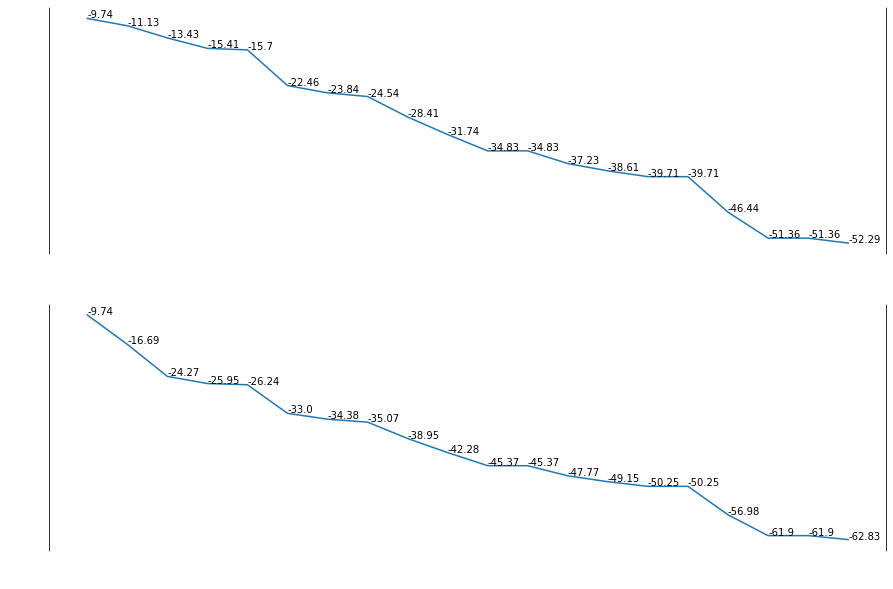

================	===============	===============	===============	===============	

This is a plot illustrating how the probability of the test sentence: 

 ['pushing', 'his', 'way', 'through', 'the', 'brambles', ',', 'severus', 'was', 'soon', 'crossing', 'the', 'short', 'grass', 'of', 'the', 'grounds', 'once', 'more', '.']

and its miminal pair: 

['pushing', 'her', 'way', 'through', 'the', 'brambles', ',', 'severus', 'was', 'soon', 'crossing', 'the', 'short', 'grass', 'of', 'the', 'grounds', 'once', 'more', '.'] 

declines as the the algorithm process each word


In [46]:
plot_minimal_pair(his_sentences[109],bad_his_sentences[109],root, AssignProbSent)

In [63]:
# plot_minimal_pair(his_sentences[110],bad_his_sentences[110],root, AssignProbSent)

In [48]:
compare_sets(his_sentences,unk_his_sentences,root)

introductory and spiel are 2 consecutive unk word in ['his', 'introductory', 'spiel']
_unk_ and introductory are 2 consecutive unk word in ['continued', '_unk_', 'introductory']
introductory and spiel are 2 consecutive unk word in ['_unk_', 'introductory', 'spiel']
Good avg log_prob is : -75.33
Bad avg log_prob is : -95.16

-----------------PERPLEXITY-------------------

good Perplexity is : 17.82
bad Perplexity is : 50.3
763 out of 764 are correct predictions


[493]

# Experiment on **her sentences**

In [49]:
filename='her_sentences'
infile = open(filename,'rb')
her_sentences=pickle.load(infile)
infile.close()
print(len(her_sentences))

328


In [50]:
bad_her_sentences = x2y(her_sentences,'her','his')
unk_her_sentences = x2y(her_sentences,'her','_unk_')

In [51]:
her_index = compare_sets(her_sentences, bad_her_sentences, root)

Good avg log_prob is : -71.35
Bad avg log_prob is : -82.16

-----------------PERPLEXITY-------------------

good Perplexity is : 15.55
bad Perplexity is : 24.13
301 out of 328 are correct predictions


In [52]:
for i in her_index:
    print(f'Sentence No.{i}:\n {her_sentences[i]},\n{bad_her_sentences[i]}\n\n')

Sentence No.7:
 ['he', '’', 's', 'such', 'a', 'prat', ',', 'it', '’', 's', 'not', 'really', 'a', 'loss', ',', 'is', 'it', '?', '”', 'mrs.', 'weasley', 'sobbed', 'harder', 'than', 'ever', 'as', 'she', 'enfolded', 'harry', 'in', 'her', 'arms', '.'],
['he', '’', 's', 'such', 'a', 'prat', ',', 'it', '’', 's', 'not', 'really', 'a', 'loss', ',', 'is', 'it', '?', '”', 'mrs.', 'weasley', 'sobbed', 'harder', 'than', 'ever', 'as', 'she', 'enfolded', 'harry', 'in', 'his', 'arms', '.']


Sentence No.11:
 ['i', 'mean', ',', 'all', 'these', 'funny', 'instructions', ',', 'who', 'knows', '?', '”', '“', 'hey', '!', '”', 'said', 'harry', 'indignantly', ',', 'as', 'she', 'pulled', 'his', 'copy', 'of', 'advanced', 'potion-making', 'out', 'of', 'his', 'bag', 'and', 'raised', 'her', 'wand', '.'],
['i', 'mean', ',', 'all', 'these', 'funny', 'instructions', ',', 'who', 'knows', '?', '”', '“', 'hey', '!', '”', 'said', 'harry', 'indignantly', ',', 'as', 'she', 'pulled', 'his', 'copy', 'of', 'advanced', 'potion-

In [53]:
# number 229 is interesting
for i in range(227,270):
    print(f'Sentence No.{i}:\n {her_sentences[i]},\n{bad_her_sentences[i]}\n\n')

Sentence No.227:
 ['“', 'and', 'yet', 'she', 'was', 'never', 'taken', 'to', 'st.', 'mungo', '’', 's', 'and', 'no', 'healer', 'was', 'ever', 'summoned', 'to', 'see', 'her', '!', '”', '“', 'really', ',', 'muriel', ',', 'how', 'you', 'can', 'possibly', 'know', 'whether', '—', '”', '“', 'for', 'your', 'information', ',', 'elphias', ',', 'my', 'cousin', 'lancelot', 'was', 'a', 'healer', 'at', 'st.', 'mungo', '’', 's', 'at', 'the', 'time', ',', 'and', 'he', 'told', 'my', 'family', 'in', 'strictest', 'confidence', 'that', 'ariana', 'had', 'never', 'been', 'seen', 'there', '.'],
['“', 'and', 'yet', 'she', 'was', 'never', 'taken', 'to', 'st.', 'mungo', '’', 's', 'and', 'no', 'healer', 'was', 'ever', 'summoned', 'to', 'see', 'his', '!', '”', '“', 'really', ',', 'muriel', ',', 'how', 'you', 'can', 'possibly', 'know', 'whether', '—', '”', '“', 'for', 'your', 'information', ',', 'elphias', ',', 'my', 'cousin', 'lancelot', 'was', 'a', 'healer', 'at', 'st.', 'mungo', '’', 's', 'at', 'the', 'time', ',

In [54]:
# plot_minimal_pair(her_sentences[229], bad_her_sentences[229], root ,AssignProbSent)

In [55]:
print(root['foul']['kittens'])

{'__COUNT__': 1, 'gamboling': {'__COUNT__': 1}}


In [56]:
compare_sets(her_sentences, unk_her_sentences, root)

Good avg log_prob is : -71.35
Bad avg log_prob is : -90.32

-----------------PERPLEXITY-------------------

good Perplexity is : 15.55
bad Perplexity is : 38.85
327 out of 328 are correct predictions


[325]

# Experiments on **what**

In [57]:
log_uni_unk = log_uni_unk_prob(root)

In [58]:
print(log_uni_unk)

-19.311846685673693


In [59]:
what_sentences = find_sentence_that_have('what', eval_set)
which_sentences = find_sentence_that_have('which', eval_set)

In [60]:
sentences_unigram_probability(eval_set ,root, log_uni_unk)

-6.4490364822549555

In [61]:
sentences_unigram_probability(what_sentences ,root, log_uni_unk)

-6.107701037638323

In [62]:
x = utils.calculating_perplexity(what_sentences,root, AssignProbSent)

The mean perplexity of these 328 sentences are 13.8


In [28]:
x = utils.calculating_perplexity(sentences,root, AssignProbSent)

NameError: name 'sentences' is not defined

Unigram probability need to be taken into consideration
look at sentences with 'has have is were was are'
set a clock on each step of the program(see where lies the bottleneck?)
print() in various parts
apostolic succession: 

3 different but related expreiments :(at least two different on the go)
* pronuon agreement: probablity lowered when pronuon changed(esp. wrt Unigram Probability, if: else:)?
* subj verb agreement
* Distance between agreeing elements (degradation of overall prob (wrt the unigrams in the middle))

Katz:languages and other abstract objects
Platonist grammar

'mentalist view of lang' 
'trans-finite number' 